# **DL Practical 4**
# *Time series prediction using RNN – Stock Market Analysis*

### Step 1: Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

### Step 2: Load the dataset

In [3]:
dataframe = pd.read_csv('tesla.csv')  # Ensure the dataset has 'Date' and 'Close' columns
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date', inplace=True)

### Step 3: Preprocess the data (Normalization)

In [4]:
closing_prices = dataframe[['Close']].values
scaler_obj = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler_obj.fit_transform(closing_prices)

### Step 4: Create sequences for the RNN

In [6]:
def generate_sequences(data, seq_len):
    X_seq, y_seq = [], []
    for idx in range(len(data) - seq_len):
        X_seq.append(data[idx:idx + seq_len])
        y_seq.append(data[idx + seq_len])
    return np.array(X_seq), np.array(y_seq)

sequence_len = 60  # You can modify the sequence length as needed
X_features, y_labels = generate_sequences(normalized_data, sequence_len)

### Step 5: Split the data into train and test sets

In [7]:
train_test_split_idx = int(len(X_features) * 0.8)
X_train_data, y_train_data = X_features[:train_test_split_idx], y_labels[:train_test_split_idx]
X_test_data, y_test_data = X_features[train_test_split_idx:], y_labels[train_test_split_idx:]

### Step 6: Build the RNN model

In [8]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_len, 1)))
rnn_model.add(Dense(1))  # Output layer for predicting the stock price

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 7: Train the model

In [9]:
training_history = rnn_model.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_test_data, y_test_data))

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.0549e-04 - val_loss: 0.0632
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4429e-06 - val_loss: 0.0635
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7318e-06 - val_loss: 0.0635
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4528e-06 - val_loss: 0.0633
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5359e-06 - val_loss: 0.0634
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4737e-06 - val_loss: 0.0634
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4923e-06 - val_loss: 0.0636
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4026e-06 - val_loss: 0.0631
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8280e-06 - val_loss: 0.0622
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5605e-06 - val_loss: 0.0629


### Step 8: Predict for the next 20 days

In [10]:
future_predictions = []
recent_sequence = normalized_data[train_test_split_idx - sequence_len:train_test_split_idx]

for _ in range(20):  # Predict for the next 20 days
    recent_sequence = np.reshape(recent_sequence, (1, sequence_len, 1))  # Ensure correct shape for RNN
    predicted_price = rnn_model.predict(recent_sequence)

    future_predictions.append(predicted_price[0][0])  # Store predicted price

    # Reshape predicted price and append it to the sequence
    predicted_price = np.reshape(predicted_price, (1, 1, 1))
    recent_sequence = np.append(recent_sequence[:, 1:, :], predicted_price, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


### Step 9: Inverse transform the predicted prices to the original scale

In [11]:
predicted_future_prices = scaler_obj.inverse_transform(np.array(future_predictions).reshape(-1, 1))

### Step 10: Compare with actual prices (next 20 days)

In [12]:
actual_future_prices = scaler_obj.inverse_transform(normalized_data[train_test_split_idx:train_test_split_idx+20])

### Step 11: Plot the results

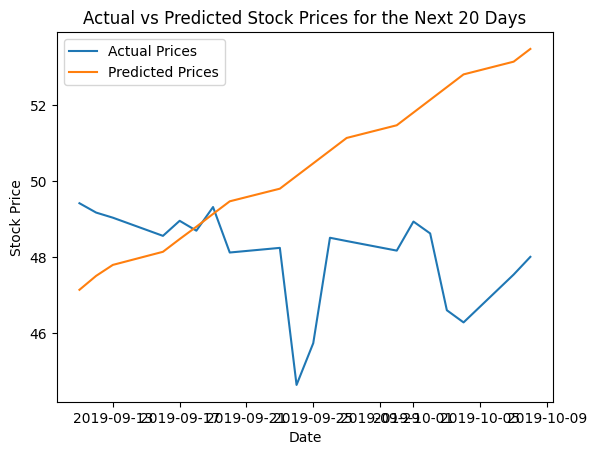

In [13]:
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+20], actual_future_prices, label='Actual Prices')
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+20], predicted_future_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices for the Next 20 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Step 12: Print actual and predicted prices for the next 20 days

In [14]:
for day in range(20):
    print(f"Day {day+1}: Actual: {actual_future_prices[day][0]}, Predicted: {predicted_future_prices[day][0]}")

Day 1: Actual: 49.41999799999999, Predicted: 47.14322280883789
Day 2: Actual: 49.17400000000001, Predicted: 47.51042556762695
Day 3: Actual: 49.040001, Predicted: 47.798316955566406
Day 4: Actual: 48.562, Predicted: 48.14299011230469
Day 5: Actual: 48.958, Predicted: 48.477413177490234
Day 6: Actual: 48.698001999999995, Predicted: 48.80170440673828
Day 7: Actual: 49.32, Predicted: 49.13911056518555
Day 8: Actual: 48.124001, Predicted: 49.4704475402832
Day 9: Actual: 48.245998, Predicted: 49.802581787109375
Day 10: Actual: 44.641998, Predicted: 50.136619567871094
Day 11: Actual: 45.740002, Predicted: 50.46930694580078
Day 12: Actual: 48.512001, Predicted: 50.8028450012207
Day 13: Actual: 48.425999, Predicted: 51.136619567871094
Day 14: Actual: 48.17399999999999, Predicted: 51.47035217285156
Day 15: Actual: 48.938, Predicted: 51.80448532104492
Day 16: Actual: 48.625999, Predicted: 52.138763427734375
Day 17: Actual: 46.605999, Predicted: 52.47323989868164
Day 18: Actual: 46.285999, Predic